# Empirical Exercise 4: Measuring Inflation in Grades

You read the paper “Measuring Inflation in Grades” which examined why undergraduate grades increased over time using tools typically used to measure price inflation. In today’s exercise, you’ll use data from that paper to create three measures of inflation using the Laspeyres, Paasche, and Fisher methods.

I have provided you an excel document with the “market basket” of courses selected by students (the total number of credit hours selected by students each year in each department: nstudentsXXX) and the “prices” of each department (the average grade awarded: gradeXXX).

Recall the formulae for the two key indices:

$P_l=\frac{\sum p_{it}q_{i0}}{\sum p_{i0}q_{i0}}$

$P_p=\frac{\sum p_{it}q_{it}}{\sum p_{i0}q_{it}}$

In short, the “counterfactual” in the Laspeyres index is the new price weighted by the old market basket. (What would be the average GPA if students took the same classes as last year but were awarded this year’s grades?)  The Paasche index’s counterfactual is the old price weighted by the new market basket. (What would be the average GPA if students were awarded the same grades as last year for the classes they took this year?) The Fisher index is the geometric mean of the two (the square root of the product of the two indices). 

For the assignment, you can construct the year-to-year indices directly in excel using the “sumproduct” command.

The goal is to produce a graph comparing the actual change in GPAs to a hypothetical changes if grades increased only because of the “inflation” you measure using the three indices. To do this, you need to start with a common starting point (the average GPA in 1982) and then increase that value by the increase in the index.

In a few sentences, compare the actual change in GPA to the increase you predict if the increase were solely because of inflation. What is causing average grades to rise?

In [2]:
import pandas as pd
import numpy as np

In [8]:
data = pd.read_excel('grades.xlsx')

# Archive the data as a CSV for easier viewing.
data.to_csv('grades.csv', index=False)

data

,schyear,gradeACCT,gradeART,gradeCED,gradeCH,gradeED,gradeEM,gradeLS,gradeMTHSC,gradeMUSIC,...,nstudentsART,nstudentsCED,nstudentsCH,nstudentsED,nstudentsEM,nstudentsLS,nstudentsMTHSC,nstudentsMUSIC,nstudentsPHYS,nstudentsTHRD
0,1982,2.089362,3.136364,3.698603,2.293907,3.439316,2.525506,3.477865,2.427298,3.418072,...,376,501,3960,3338,2115,768,9801,1119,3456,909
1,1983,2.176828,3.008929,3.720389,2.268253,3.418349,2.537291,3.551440,2.501849,3.339973,...,335,633,3784,3021,2223,729,9617,1376,3276,921
2,1984,2.403558,3.163022,3.819580,2.305327,3.471547,2.546019,3.551683,2.572157,3.365575,...,336,861,3908,3155,1910,832,9840,1208,3205,920
3,1985,2.394701,3.209302,3.557983,2.135961,3.408243,2.470143,3.700913,2.437502,3.217645,...,387,713,3701,3242,1828,876,9836,1305,3016,1072
4,1986,2.293759,3.232387,3.574338,2.164248,3.454809,2.550128,3.651189,2.426553,3.146375,...,317,732,3509,3256,1738,883,9794,1254,2906,914
5,1987,2.313371,3.268018,3.596594,2.200459,3.557880,2.377671,3.736313,2.421635,3.264727,...,445,827,3831,3531,1849,895,10416,1276,2999,888
6,1988,2.332209,3.194444,3.609987,2.173720,3.553221,2.517597,3.820598,2.295262,3.330631,...,477,909,3765,4492,1952,903,10922,1520,3123,935
7,1989,2.324682,3.341986,3.523186,2.147390,3.651119,2.459579,3.827231,2.294009,3.267814,...,508,821,4109,4983,2040,874,11104,1538,3426,1020
8,1990,2.354736,3.293023,3.595454,2.220666,3.644526,2.392625,3.862539,2.336732,3.339153,...,569,696,4281,5529,2137,953,10970,1910,3356,1005
9,1991,2.352878,3.376989,3.765390,2.288982,3.616067,2.335036,3.879917,2.362864,3.358878,...,532,568,4474,6234,2214,966,10712,1943,3564,1137


In [9]:
data.columns

data["gradeACCT"] * data["nstudentsACCT"]

0      7573.937250
1      7549.239504
2      8866.725462
3      9756.011874
4      9326.424094
5      9704.591345
6     10742.154654
7     10900.433898
8     11488.756944
9     10430.308174
10     9317.761416
11     9431.916369
12     8582.314345
13     6874.893052
14     6322.276892
15     6877.625160
16     7358.595920
17     7813.195938
18     8384.282530
19     7738.688828
dtype: float64

In [13]:
data["schyear"] <= 1998

data[data["schyear"] % 2 == 0]

,schyear,gradeACCT,gradeART,gradeCED,gradeCH,gradeED,gradeEM,gradeLS,gradeMTHSC,gradeMUSIC,...,nstudentsART,nstudentsCED,nstudentsCH,nstudentsED,nstudentsEM,nstudentsLS,nstudentsMTHSC,nstudentsMUSIC,nstudentsPHYS,nstudentsTHRD
0,1982,2.089362,3.136364,3.698603,2.293907,3.439316,2.525506,3.477865,2.427298,3.418072,...,376,501,3960,3338,2115,768,9801,1119,3456,909
2,1984,2.403558,3.163022,3.819580,2.305327,3.471547,2.546019,3.551683,2.572157,3.365575,...,336,861,3908,3155,1910,832,9840,1208,3205,920
4,1986,2.293759,3.232387,3.574338,2.164248,3.454809,2.550128,3.651189,2.426553,3.146375,...,317,732,3509,3256,1738,883,9794,1254,2906,914
6,1988,2.332209,3.194444,3.609987,2.173720,3.553221,2.517597,3.820598,2.295262,3.330631,...,477,909,3765,4492,1952,903,10922,1520,3123,935
8,1990,2.354736,3.293023,3.595454,2.220666,3.644526,2.392625,3.862539,2.336732,3.339153,...,569,696,4281,5529,2137,953,10970,1910,3356,1005
10,1992,2.402104,3.401146,3.888228,2.305636,3.633885,2.265056,3.931796,2.419118,3.251559,...,573,712,4985,5986,2084,1041,10294,1858,3579,1124
12,1994,2.644781,3.289827,3.821196,2.352755,3.678215,2.404927,3.908144,2.337469,3.410676,...,513,624,4665,5905,2033,1056,9008,1709,3200,1035
14,1996,2.369669,3.423738,3.701860,2.390192,3.590413,2.415259,3.937364,2.370263,3.438255,...,622,667,4708,5327,1410,1681,9281,1904,2614,948
16,1998,2.448784,3.337669,3.677785,2.489735,3.527505,2.419729,3.901444,2.401122,3.574607,...,594,505,4869,5386,1034,1375,9798,1916,2679,1026
18,2000,2.433754,3.498657,3.723138,2.476342,3.673155,2.408475,3.950696,2.385551,3.655153,...,605,521,5095,4860,1180,1724,11067,2244,3150,1011


,schyear,gradeACCT,gradeART,gradeCED,gradeCH,gradeED,gradeEM,gradeLS,gradeMTHSC,gradeMUSIC,...,nstudentsART,nstudentsCED,nstudentsCH,nstudentsED,nstudentsEM,nstudentsLS,nstudentsMTHSC,nstudentsMUSIC,nstudentsPHYS,nstudentsTHRD
0,1982,2.089362,3.136364,3.698603,2.293907,3.439316,2.525506,3.477865,2.427298,3.418072,...,376,501,3960,3338,2115,768,9801,1119,3456,909
1,1983,2.176828,3.008929,3.720389,2.268253,3.418349,2.537291,3.551440,2.501849,3.339973,...,335,633,3784,3021,2223,729,9617,1376,3276,921
2,1984,2.403558,3.163022,3.819580,2.305327,3.471547,2.546019,3.551683,2.572157,3.365575,...,336,861,3908,3155,1910,832,9840,1208,3205,920
3,1985,2.394701,3.209302,3.557983,2.135961,3.408243,2.470143,3.700913,2.437502,3.217645,...,387,713,3701,3242,1828,876,9836,1305,3016,1072
4,1986,2.293759,3.232387,3.574338,2.164248,3.454809,2.550128,3.651189,2.426553,3.146375,...,317,732,3509,3256,1738,883,9794,1254,2906,914


In [4]:
def laspeyres_method(_P, _Q):
    
    p_base = _P[0]
    q_base = _Q[0]
    
    laspeyres = ( np.sum(_P * q_base) /
                  np.dot(_P, _Q) )
    
    return laspeyres

def paasche_method(_P, _Q):
    
    p_base = _P[0]
    q_base = _Q[0]
    
    paache = ( np.dot(_P, _Q) /
               np.sum(p_base * _Q) )
    
    return paache

def fisher_method(_P, _Q):
    return np.sqrt(paasche_method(_P, _Q) * laspeyres_method(_P, _Q))

In [5]:
P = data.gradeACCT.to_numpy()
Q = data.nstudentsACCT.to_numpy()

print(laspeyres_method(P, Q))
print(paasche_method(P, Q))
print(fisher_method(P, Q))

0.9857122751116323
1.1360494969092345
1.0582145029424925


In [6]:
def gen_fisher_indices(_P, _Q):
    
    indices = np.zeros(len(_P))
    
    for r in range(len(indices)):
        
        _Psub = _P[0:r + 1]
        _Qsub = _Q[0:r + 1]
        
        indices[r] = fisher_method(
            _Psub,
            _Qsub
        )
    
    return indices

def gen_year2year_fisher(_P, _Q):
    
    indices = np.zeros(len(_P), 1)
    
    # The first year is the baseline and obviously doesn't
    # have inflation, so the Fisher value is 1
    indices[0] = 1
    
    for r in range(1, len(indices)):
        
        _Psub = np.array(_P[r - 1:r + 1])
        _Qsub = np.array(_Q[r - 1:r + 1])
        
        indices[r] = fisher_method(
            _Psub,
            _Qsub
        )
        
    return indices
       

In [7]:
infl_adj = gen_fisher_indices(P, Q)

P / infl_adj

array([2.089362  , 2.13094303, 2.320077  , 2.32747153, 2.24765286,
       2.28378137, 2.33039224, 2.34696278, 2.40042505, 2.40403558,
       2.44173353, 2.58984821, 2.62804649, 2.41096549, 2.29974901,
       2.32894923, 2.33812635, 2.21691504, 2.31187719, 2.34690887])

In [8]:
classes = [col[5:] for col in data.columns[1:12]]
classes

['ACCT',
 'ART',
 'CED',
 'CH',
 'ED',
 'EM',
 'LS',
 'MTHSC',
 'MUSIC',
 'PHYS',
 'THRD']

In [9]:
all_grade = np.zeros(len(data))
student_sum = np.zeros(len(data))

for cl in classes:
    
    all_grade += data[f"grade{cl}"] * data[f"nstudents{cl}"]
    student_sum += data[f"nstudents{cl}"]

all_grade /= student_sum
data["gradeALL"] = all_grade
data["nstudentsALL"] = student_sum

data[["gradeALL", "nstudentsALL"]]

,gradeALL,nstudentsALL
0,2.597026,29968.0
1,2.634247,29383.0
2,2.708666,29864.0
3,2.616532,30050.0
4,2.620249,29369.0
5,2.641302,31152.0
6,2.634236,33604.0
7,2.637182,35112.0
8,2.689220,36285.0
9,2.713639,36777.0


In [10]:
classes.append("ALL")

for cl in classes:
    
    fisher_col = f"fisher{cl}"
    print(fisher_col)
    
    data[fisher_col] = gen_fisher_indices(
        data[f"grade{cl}"],
        data[f"nstudents{cl}"]
    )
    
    adj_col = f"adj{cl}"
    print(adj_col)
    
    data[adj_col] = np.multiply(
        data[f"grade{cl}"],
        data[f"fisher{cl}"]
    )
    
data

fisherACCT
adjACCT
fisherART
adjART
fisherCED
adjCED
fisherCH
adjCH
fisherED
adjED
fisherEM
adjEM
fisherLS
adjLS
fisherMTHSC
adjMTHSC
fisherMUSIC
adjMUSIC
fisherPHYS
adjPHYS
fisherTHRD
adjTHRD
fisherALL
adjALL


,schyear,gradeACCT,gradeART,gradeCED,gradeCH,gradeED,gradeEM,gradeLS,gradeMTHSC,gradeMUSIC,...,fisherMTHSC,adjMTHSC,fisherMUSIC,adjMUSIC,fisherPHYS,adjPHYS,fisherTHRD,adjTHRD,fisherALL,adjALL
0,1982,2.089362,3.136364,3.698603,2.293907,3.439316,2.525506,3.477865,2.427298,3.418072,...,1.000000,2.427298,1.000000,3.418072,1.000000,2.342080,1.000000,3.229592,1.000000,2.597026
1,1983,2.176828,3.008929,3.720389,2.268253,3.418349,2.537291,3.551440,2.501849,3.339973,...,1.012412,2.532902,0.941672,3.145159,1.017783,2.426184,0.989207,3.098827,1.008511,2.656666
2,1984,2.403558,3.163022,3.819580,2.305327,3.471547,2.546019,3.551683,2.572157,3.365575,...,1.017466,2.617081,0.946053,3.184013,1.027803,2.454338,0.984809,3.066381,1.013399,2.744959
3,1985,2.394701,3.209302,3.557983,2.135961,3.408243,2.470143,3.700913,2.437502,3.217645,...,1.013178,2.469623,0.933879,3.004892,1.034947,2.368473,0.961642,2.963322,1.010633,2.644355
4,1986,2.293759,3.232387,3.574338,2.164248,3.454809,2.550128,3.651189,2.426553,3.146375,...,1.010592,2.452255,0.928426,2.921175,1.046882,2.487853,0.965870,3.032984,1.011429,2.650195
5,1987,2.313371,3.268018,3.596594,2.200459,3.557880,2.377671,3.736313,2.421635,3.264727,...,1.003394,2.429855,0.926202,3.023798,1.052669,2.508161,0.973618,3.157995,1.007602,2.661381
6,1988,2.332209,3.194444,3.609987,2.173720,3.553221,2.517597,3.820598,2.295262,3.330631,...,0.991054,2.274728,0.913386,3.042152,1.051933,2.442751,0.976823,3.218291,0.998915,2.631377
7,1989,2.324682,3.341986,3.523186,2.147390,3.651119,2.459579,3.827231,2.294009,3.267814,...,0.980806,2.249979,0.902299,2.948545,1.043870,2.378171,0.974873,3.271164,0.989597,2.609748
8,1990,2.354736,3.293023,3.595454,2.220666,3.644526,2.392625,3.862539,2.336732,3.339153,...,0.974614,2.277412,0.881597,2.943787,1.041158,2.465462,0.973080,3.198454,0.981577,2.639676
9,1991,2.352878,3.376989,3.765390,2.288982,3.616067,2.335036,3.879917,2.362864,3.358878,...,0.971450,2.295405,0.865334,2.906551,1.033733,2.357616,0.965433,3.198599,0.975028,2.645873


In [11]:
data.to_csv("adjgrades.csv")

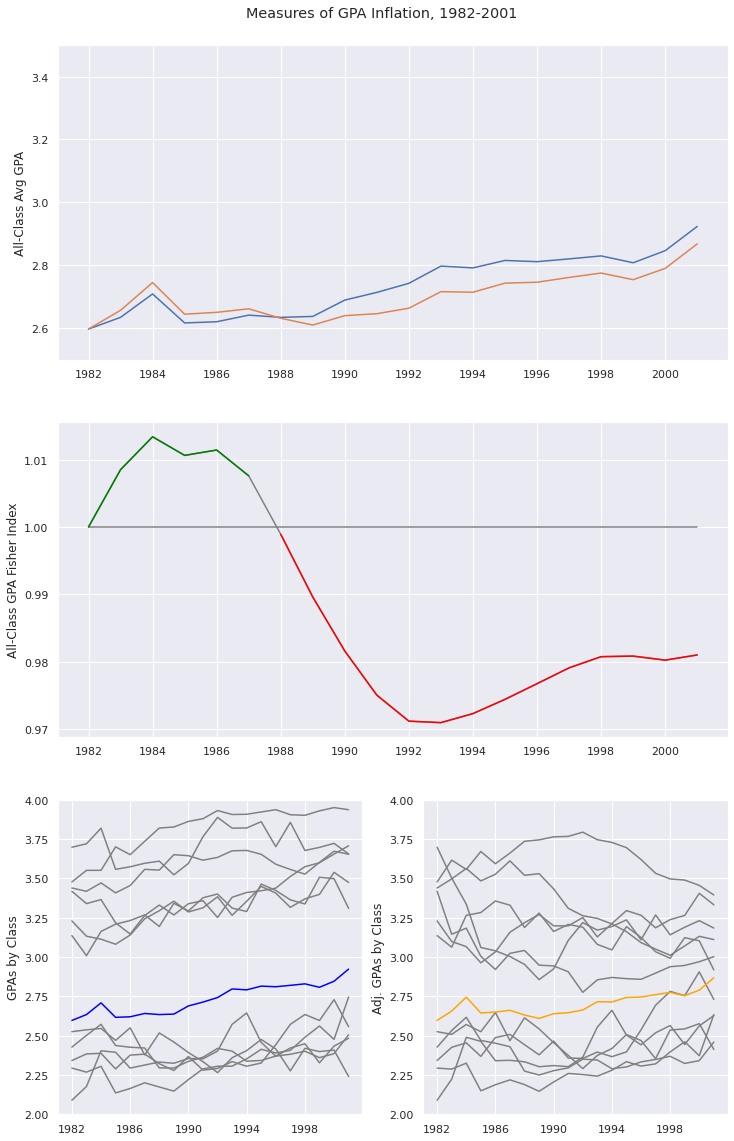

In [92]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

sns.set_theme()

# Setting up the plot surface
fig = plt.figure(figsize=(12, 18))
plt.suptitle("Measures of GPA Inflation, 1982-2001")
fig.subplots_adjust(top=0.95)
gs = GridSpec(nrows=3, ncols=2)

year_ticks = np.arange(
    data["schyear"].min(),
    data["schyear"].max(),
    2
)

# First axes
ax0 = fig.add_subplot(gs[0, :])
ax0.set_ylabel("All-Class Avg GPA")
ax0.set_ylim([2.5, 3.5])
ax0.set_xticks(year_ticks)

ax0.plot(
    data["schyear"],
    data[["gradeALL", "adjALL"]]
)

ax1 = fig.add_subplot(gs[1, :])
ax1.set_ylabel("All-Class GPA Fisher Index")
ax1.set_xticks(year_ticks)

# Plotting baseline at 1
ax1.plot(
    data["schyear"],
    [1 for x in range(len(data))],
    color="gray"
)

# Plotting gray underlap to cover positive to negative jumps
ax1.plot(
    data["schyear"],
    data["fisherALL"],
    color="gray"
)

# Plot positive values as green
ax1.plot(
    data["schyear"],
    data.where(data["fisherALL"] >= 1)["fisherALL"],
    color="green"
)

# Plot negative values as red
ax1.plot(
    fisherNeg["schyear"],
    fisherNeg["fisherALL"],
    color="red"
)

# Plotting all actual grades over time
ax2 = fig.add_subplot(gs[2, 0])
ax2.set_ylabel("GPAs by Class")
ax2.set_ylim([2, 4])
ax2.set_xticks(year_ticks[::2])


ax2.plot(
    data["schyear"],
    data[data.columns[1:12]],
    color = "gray"
)
ax2.plot(
    data["schyear"],
    data["gradeALL"],
    color = "blue"
)

adj = [
    'adjACCT',
    'adjART',
    'adjCED',
    'adjCH',
    'adjED',
    'adjEM',
    'adjLS',
    'adjMTHSC',
    'adjMUSIC',
    'adjPHYS',
    'adjTHRD'
]

# Third axes
ax3 = fig.add_subplot(gs[2, 1])
ax3.set_ylabel("Adj. GPAs by Class")
ax3.set_ylim([2, 4])
ax3.set_xticks(year_ticks[::2])

ax3.plot(
    data["schyear"],
    data[adj],
    color = "gray"
)
ax3.plot(
    data["schyear"],
    data["adjALL"],
    color = "orange"
)

plt.savefig("grades.png")
plt.show()

2001